# Image Encoding

/Users/quansun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[[231 240 209]
  [234 245 231]
  [229 241 229]
  ...
  [165  69  83]
  [124  49  88]
  [119  55  92]]

 [[238 248 223]
  [241 251 240]
  [236 248 238]
  ...
  [123  29  45]
  [125  49  75]
  [129  56  99]]

 [[238 247 226]
  [241 252 238]
  [237 249 235]
  ...
  [120  32  48]
  [133  57  67]
  [131  52  97]]

 ...

 [[ 77  75  34]
  [ 69  66  33]
  [ 75  69  45]
  ...
  [135 114 121]
  [134 115 121]
  [133 114 118]]

 [[ 73  68  38]
  [ 71  65  39]
  [ 80  73  54]
  ...
  [139 119 128]
  [136 119 127]
  [135 118 126]]

 [[ 76  68  47]
  [ 75  67  48]
  [ 84  75  58]
  ...
  [141 121 132]
  [137 120 130]
  [134 118 128]]]


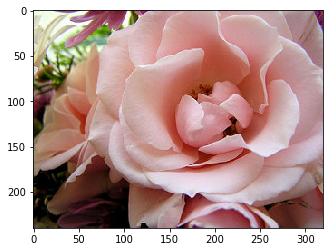

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

image_raw_data = tf.gfile.FastGFile('./mnist/test_image.jpg','rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    print(img_data.eval())
    
    plt.imshow(img_data.eval())
    plt.show()
    
    img_data = tf.image.convert_image_dtype(img_data,dtype=tf.uint8)
    
    encoded_image = tf.image.encode_jpeg(img_data)
    with tf.gfile.GFile('./mnist/test.txt','wb') as f:
        f.write(encoded_image.eval())

# Image Resizing

>4 algorithm for resize images:
1. Bilinear interpolation (method=0)
2. Nearest neighbor interpolation (method=1)
3. Bicubic interpolation (method=2)
4. Area interpolation (method=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


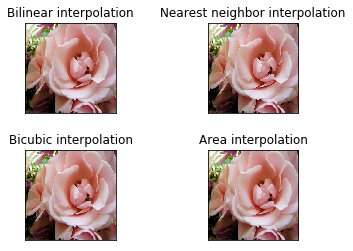

In [2]:
import numpy as np
image_raw_data = tf.gfile.FastGFile('./mnist/test_image.jpg','rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    img_data = tf.image.convert_image_dtype(img_data,dtype=tf.float32)
    resized0 = tf.image.resize_images(img_data,(300,300),method=0) # input images, image size, the algorithm
#     print(img_data.get_shape())
    resized1 = tf.image.resize_images(img_data,(300,300),method=1)
    resized2 = tf.image.resize_images(img_data,(300,300),method=2)
    resized3 = tf.image.resize_images(img_data,(300,300),method=3)
    resized0 = np.asarray(resized0.eval())
    resized1 = np.asarray(resized1.eval())
    resized2 = np.asarray(resized2.eval())
    resized3 = np.asarray(resized3.eval())
    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    
    plt.subplot(2,2,1)
    plt.imshow(resized0)
    plt.title('Bilinear interpolation')
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(2,2,2)
    plt.imshow(resized1)
    plt.title('Nearest neighbor interpolation')
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(2,2,3)
    plt.imshow(resized2)
    plt.title('Bicubic interpolation')
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(2,2,4)
    plt.imshow(resized3)
    plt.title('Area interpolation')
    plt.xticks(())
    plt.yticks(())

# Crop Image

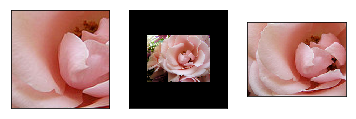

In [3]:
import numpy as np
image_raw_data = tf.gfile.FastGFile('./mnist/test_image.jpg','rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    img_data = tf.image.convert_image_dtype(img_data,dtype=tf.float32)
    
    # crop the center of the image
    croped = tf.image.resize_image_with_crop_or_pad(img_data,100,100)
    padded = tf.image.resize_image_with_crop_or_pad(img_data,500,500)
    central_cropped = tf.image.central_crop(img_data,0.5)
    croped = np.asarray(croped.eval())
    padded = np.asarray(padded.eval())
    central_cropped = np.asarray(central_cropped.eval())
    
    plt.subplot(1,3,1)
    plt.imshow(croped)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(1,3,2)
    plt.imshow(padded)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(1,3,3)
    plt.imshow(central_cropped)
    plt.xticks(())
    plt.yticks(())

# Flip Image

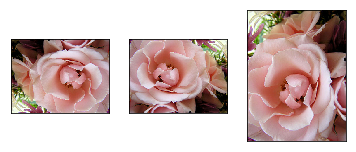

In [4]:
import numpy as np
image_raw_data = tf.gfile.FastGFile('./mnist/test_image.jpg','rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    img_data = tf.image.convert_image_dtype(img_data,dtype=tf.float32)
    
    # crop the center of the image
    flipped_ud = tf.image.flip_up_down(img_data)
    
    flipped_lr = tf.image.flip_left_right(img_data)
    
    transposed = tf.image.transpose_image(img_data)
    
    flipped_ud = np.asarray(flipped_ud.eval())
    flipped_lr = np.asarray(flipped_lr.eval())
    transposed = np.asarray(transposed.eval())
    
    plt.subplot(1,3,1)
    plt.imshow(flipped_ud)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(1,3,2)
    plt.imshow(flipped_lr)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(1,3,3)
    plt.imshow(transposed)
    plt.xticks(())
    plt.yticks(())

# Color Adjust

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Adjust brightness, conntrast, hue and saturation


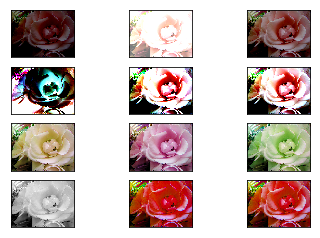

In [5]:
import numpy as np
image_raw_data = tf.gfile.FastGFile('./mnist/test_image.jpg','rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    img_data = tf.image.convert_image_dtype(img_data,dtype=tf.float32)
    adjusted1 = tf.image.adjust_brightness(img_data, -0.5)
    adjusted1 = np.asarray(adjusted1.eval())
    adjusted2 = tf.image.adjust_brightness(img_data,0.5)
    adjusted2 = np.asarray(adjusted2.eval())
    adjusted3 = tf.image.random_brightness(img_data, 1)
    adjusted3 = np.asarray(adjusted3.eval())
    
    adjusted4 = tf.image.adjust_contrast(img_data,-5)
    adjusted4 = np.asarray(adjusted4.eval())
    adjusted5 = tf.image.adjust_contrast(img_data,5)
    adjusted5 = np.asarray(adjusted5.eval())
    adjusted6 = tf.image.random_contrast(img_data,1,5)
    adjusted6 = np.asarray(adjusted6.eval())
    
    adjusted7 = tf.image.adjust_hue(img_data,0.1)
    adjusted7 = np.asarray(adjusted7.eval())
    adjusted8 = tf.image.adjust_hue(img_data,0.9)
    adjusted8 = np.asarray(adjusted8.eval())
    adjusted9 = tf.image.random_hue(img_data,0.5)
    adjusted9 = np.asarray(adjusted9.eval())
    
    adjusted10 = tf.image.adjust_saturation(img_data,-5)
    adjusted10 = np.asarray(adjusted10.eval())
    adjusted11 = tf.image.adjust_saturation(img_data,5)
    adjusted11 = np.asarray(adjusted11.eval())
    adjusted12 = tf.image.random_saturation(img_data,1,5)
    adjusted12 = np.asarray(adjusted12.eval())
    
    plt.subplot(4,3,1)
    plt.imshow(adjusted1)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,2)
    plt.imshow(adjusted2)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,3)
    plt.imshow(adjusted3)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,4)
    plt.imshow(adjusted4)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,5)
    plt.imshow(adjusted5)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,6)
    plt.imshow(adjusted6)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,7)
    plt.imshow(adjusted7)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,8)
    plt.imshow(adjusted8)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,9)
    plt.imshow(adjusted9)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,10)
    plt.imshow(adjusted10)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,11)
    plt.imshow(adjusted11)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4,3,12)
    plt.imshow(adjusted12)
    plt.xticks(())
    plt.yticks(())
    
    print("Adjust brightness, conntrast, hue and saturation")

# Bounding Boxes

In [6]:
import numpy as np
image_raw_data = tf.gfile.FastGFile('./mnist/test_image.jpg','rb').read()

with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    img_data = tf.image.resize_images(img_data,(100,150),method=1)
    img_data = tf.image.convert_image_dtype(img_data,dtype=tf.float32)
    batched = tf.expand_dims(img_data,0)
    boxes = tf.constant([[[0.05,0.05,0.9,0.7],[0.35,0.47,0.5,0.56]]])
    result = tf.image.draw_bounding_boxes(batched, boxes)
    result = np.asarray(result)
    print(result)

Tensor("DrawBoundingBoxes:0", shape=(1, 100, 150, ?), dtype=float32)
